# CSCE 554 HW 4
# Marvin Newlin
# 13 Aug 19

In [100]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

## 4.1

### Solution

#### Answer

According to the textbook, the estimate of the error variance $\sigma^2$, is $E(MS_E)$. We have that $SSE = 500$. We know that $a = 4$, $b = 6$, and for a completely randomized design, $N = ab = 24$. Thus we have $N-a = 24-4 = 20$ degrees of freedom. We can calculate MSE as $MS_E = \frac{SS_E}{N-a} \Rightarrow MS_E = \frac{500}{20} = 25 = \hat{\sigma^2}$. Thus, the answer is $\textbf{(a)}$. 


## 4.9.  Be sure to include residual plots verifying your analysis

### Solution

In [101]:
data = np.array([[13, 22, 18, 39],
                 [16, 24, 17, 44],
                 [5,  4,  1,  22]])
a = 3
b = 4
N = a*b

# Calculate SST
data_mean = np.mean(data)
data_sum = np.sum(data)
data_squared = np.square(data)
data_squared_sum = np.sum(data_squared)

SST = data_squared_sum - ((data_sum*data_sum)/N)
display(md("SST: {}".format(SST)))

# Calculate SSTreatments
treat_sum = np.sum(data, axis=1) # Array of sum of each row
SSTreat = (1/b)*np.sum(np.square(treat_sum)) - ((data_sum*data_sum)/N)
display(md("SSTreatments: {}".format(SSTreat)))

# Calculate SSBlocks
block_sum = np.sum(data, axis=0) # Array of sum of each column
SSB = (1/a)*np.sum(np.square(block_sum)) - ((data_sum*data_sum)/N)
display(md("SSBlocks: {:.4f}".format(SSB)))

# Calculate SSE
SSE = SST - SSTreat - SSB
display(md("SSE: {:.4f}".format(SSE)))

MSTreat = SSTreat/(a-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTreat/MSE
display(md("MSTreat: {:.4f}".format(MSTreat)))
display(md("MSE: {:.4f}".format(MSE)))
display(md("F0: {:.4f}".format(F0)))
f_crit = stats.f.ppf(1-0.05,a-1,(a-1)*(b-1))
display(md("FCrit: {:.3f}".format(f_crit)))
p_val = 1-stats.f.cdf(F0,a-1,(a-1)*(b-1))
display(md("p-value: {:.6f}".format(p_val)))

SST: 1862.25

SSTreatments: 703.5

SSBlocks: 1106.9167

SSE: 51.8333

MSTreat: 351.7500

MSE: 8.6389

F0: 40.7170

FCrit: 5.143

p-value: 0.000323

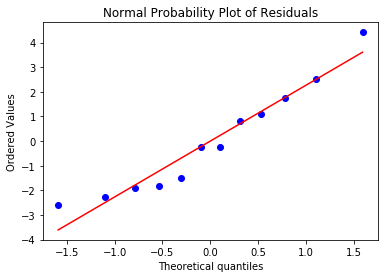

In [102]:
residuals_list = np.array([])
residuals = np.zeros((a,b))
for i in range(a):
    for j in range(b):
        e_ij = data[i,j] - np.mean(data[i,:]) - np.mean(data[:,j]) + data_mean # From slides e_ij = y_ij - y_i._bar - y_.j_bar + y_.._bar
        residuals_list = np.append(residuals_list, e_ij)
        residuals[i,j] = e_ij


stats.probplot(residuals_list, plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()



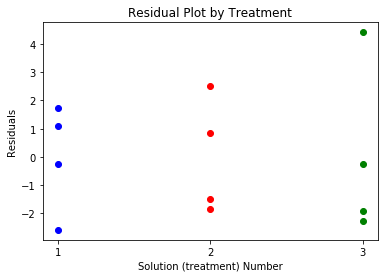

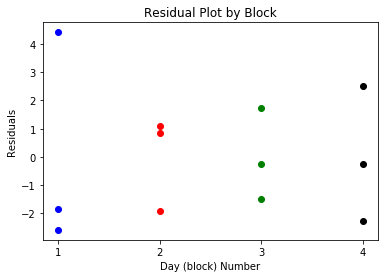

In [103]:
plt.plot(np.full(b, fill_value=1), residuals[0,:], 'bo', label='Solution 1')
plt.plot(np.full(b, fill_value=2), residuals[1,:], 'ro', label='Solution 2')
plt.plot(np.full(b, fill_value=3), residuals[2,:], 'go', label='Solution 3')
plt.ylabel("Residuals")
plt.xlabel("Solution (treatment) Number")
plt.title("Residual Plot by Treatment")
plt.xticks(np.arange(1,a+1,1))
plt.show()

plt.plot(np.full(a,fill_value=1), residuals[:,0], 'bo', label='Day 1')
plt.plot(np.full(a,fill_value=2), residuals[:,1], 'ro', label='Day 2')
plt.plot(np.full(a,fill_value=3), residuals[:,2], 'go', label='Day 3')
plt.plot(np.full(a,fill_value=4), residuals[:,3], 'ko', label='Day 4')
plt.ylabel("Residuals")
plt.xlabel("Day (block) Number")
plt.title("Residual Plot by Block")
plt.xticks(np.arange(1,b+1,1))
plt.show()


### Answer

Based on the value of $F_0 = 40.7 > 5.143 \approx F_{0.05, 2,6}$ we can reject $H_0$. Thus, we can say that the solutions do have different effects on the bacteria growth. 

The residuals seem to pretty close to normally distributed in both the blocks and treatments. Additionally, inspecting the residuals for each treatment and block the variances are pretty close to constant with no large differences in variance. Thus, the 3 assumptions for ANOVA with RCBD are satisfied.

## 4.16

### a )

### Solution

In [104]:
data = np.array([[1244,   21,  82,  2221, 905, 839],
                 [ 281,  129, 396,  1306, 336, 910],
                 [ 220,   84, 458,   543, 300, 794],
                 [ 225,   83, 425,   552, 291, 826],
                 [  19,   11, -34,   121,  15, 103],
                 [ -20,   35, -53,   170, 104, 199]])

a = 6
b = 6
N = a*b

# Calculate SST
data_mean = np.mean(data)
data_sum = np.sum(data)
data_squared = np.square(data)
data_squared_sum = np.sum(data_squared)

SST = data_squared_sum - ((data_sum*data_sum)/N)
display(md("SST: {:.4f}".format(SST)))

# Calculate SSTreatments
treat_sum = np.sum(data, axis=1) # Array of sum of each row
SSTreat = (1/b)*np.sum(np.square(treat_sum)) - ((data_sum*data_sum)/N)
display(md("SSTreatments: {:.4f}".format(SSTreat)))

# Calculate SSBlocks
block_sum = np.sum(data, axis=0) # Array of sum of each column
SSB = (1/a)*np.sum(np.square(block_sum)) - ((data_sum*data_sum)/N)
display(md("SSBlocks: {:.4f}".format(SSB)))

# Calculate SSE
SSE = SST - SSTreat - SSB
display(md("SSE: {:.4f}".format(SSE)))

MSTreat = SSTreat/(a-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTreat/MSE
display(md("MSTreat: {:.4f}".format(MSTreat)))
display(md("MSE: {:.4f}".format(MSE)))
display(md("F0: {:.4f}".format(F0)))
f_crit = stats.f.ppf(1-0.05,a-1,(a-1)*(b-1))
display(md("FCrit: {:.3f}".format(f_crit)))
p_val = 1-stats.f.cdf(F0,a-1,(a-1)*(b-1))
display(md("p-value: {}".format(p_val)))

SST: 8056043.6389

SSTreatments: 2989130.4722

SSBlocks: 2287339.4722

SSE: 2779573.6944

MSTreat: 597826.0944

MSE: 111182.9478

F0: 5.3770

FCrit: 2.603

p-value: 0.0017201071939910717

### Answer

Based on the value of $F_0 = 5.377 > 2.603 = F_{0.05,5,25}$ and the $p$-value of $0.0017$ we can conclude that the algorithms differ in their mean cost estimation accuracy.

### b

### Solution

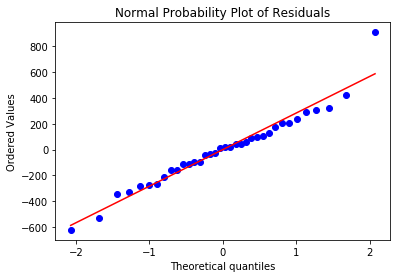

In [105]:
residuals_list = np.array([])
residuals = np.zeros((a,b))
for i in range(a):
    for j in range(b):
        e_ij = data[i,j] - np.mean(data[i,:]) - np.mean(data[:,j]) + data_mean # From slides e_ij = y_ij - y_i._bar - y_.j_bar + y_.._bar
        residuals_list = np.append(residuals_list, e_ij)
        residuals[i,j] = e_ij


stats.probplot(residuals_list, plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

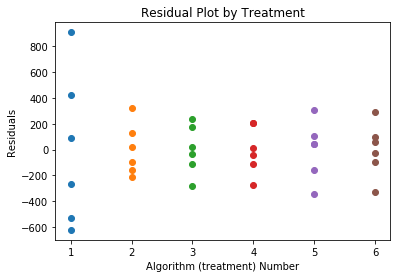

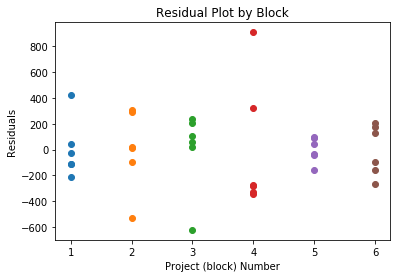

In [106]:
for i in range(b):
    plt.plot(np.full(b, fill_value=i+1), residuals[i,:], 'o')
plt.ylabel("Residuals")
plt.xlabel("Algorithm (treatment) Number")
plt.title("Residual Plot by Treatment")
plt.xticks(np.arange(1,a+1,1))
plt.show()

for j in range(a):
    plt.plot(np.full(a,fill_value=j+1), residuals[:,j], 'o')
plt.ylabel("Residuals")
plt.xlabel("Project (block) Number")
plt.title("Residual Plot by Block")
plt.xticks(np.arange(1,b+1,1))
plt.show()

### Answer

Examining the normal probability plot of the residuals, we see that they are basically all normally distributed. There is one outlier at about 800, and examining the treatment and block residuals we see that that outlier at 800 also throws off the constant variance between each treatment and block. Besides the single outlier, the treatments have almost constant variance. The blocks have slight differences in variance but minus the outlier they are all relatively close. 

### c )
#### Answer 

In [107]:
lowest_mean = np.inf
best_alg = 7
for i in range(a):
    if data[i,:].mean() < lowest_mean:
        lowest_mean = data[i,:].mean()
        best_alg = i
print("Lowest mean percent error: {:.3f} for Algorithm {:d}.".format(lowest_mean, best_alg+1))

Lowest mean percent error: 39.167 for Algorithm 5.


Based on the mean percent error across all of the projects, since we we want it to be as low as possible, the FUNCTION POINTS algorithm is the best. It has the lowest mean percent error in dev cost estimation.

## 4.19

### a )

### Solution

In [108]:
data = np.array([[ 8, 4, 5, 6],
                 [14, 5, 6, 9],
                 [14, 6, 9, 2],
                 [17, 9, 3, 6]])

a = 4
b = 4
N = a*b

# Calculate SST
data_mean = np.mean(data)
data_sum = np.sum(data)
data_squared = np.square(data)
data_squared_sum = np.sum(data_squared)

SST = data_squared_sum - ((data_sum*data_sum)/N)
display(md("SST: {:.4f}".format(SST)))

# Calculate SSTreatments
treat_sum = np.sum(data, axis=1) # Array of sum of each row
SSTreat = (1/b)*np.sum(np.square(treat_sum)) - ((data_sum*data_sum)/N)
display(md("SSTreatments: {:.4f}".format(SSTreat)))

# Calculate SSBlocks
block_sum = np.sum(data, axis=0) # Array of sum of each column
SSB = (1/a)*np.sum(np.square(block_sum)) - ((data_sum*data_sum)/N)
display(md("SSBlocks: {:.4f}".format(SSB)))

# Calculate SSE
SSE = SST - SSTreat - SSB
display(md("SSE: {:.4f}".format(SSE)))

MSTreat = SSTreat/(a-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTreat/MSE
display(md("MSTreat: {:.4f}".format(MSTreat)))
display(md("MSE: {:.4f}".format(MSE)))
display(md("F0: {:.4f}".format(F0)))
f_crit = stats.f.ppf(1-0.05,a-1,(a-1)*(b-1))
display(md("FCrit: {:.3f}".format(f_crit)))
p_val = 1-stats.f.cdf(F0,a-1,(a-1)*(b-1))
display(md("p-value: {:.3f}".format(p_val)))

SST: 265.4375

SSTreatments: 22.1875

SSBlocks: 165.1875

SSE: 78.0625

MSTreat: 7.3958

MSE: 8.6736

F0: 0.8527

FCrit: 3.863

p-value: 0.500

#### Answer

Based on the value of $F_0 = 0.8527 < 3.863 = F_{crit}$ and the $p$-value of $0.500 > 0.05$, we can say that there is no significant difference in the mean grain size. Thus, there is no evidence that stirring rate affects grain size. 

### b )

### Solution

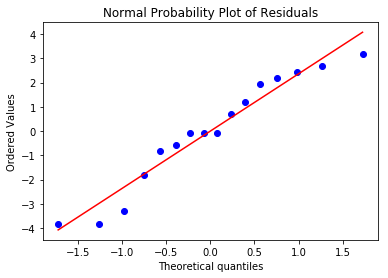

In [109]:
residuals_list = np.array([])
residuals = np.zeros((a,b))
for i in range(a):
    for j in range(b):
        e_ij = data[i,j] - np.mean(data[i,:]) - np.mean(data[:,j]) + data_mean
        residuals_list = np.append(residuals_list, e_ij)
        residuals[i,j] = e_ij


stats.probplot(residuals_list, plot=plt)
plt.title("Normal Probability Plot of Residuals")
plt.show()

#### Answer

The residuals here appear to have a slight snaking pattern along with a couple of outliers. Based on this, transformation of the data may help the residuals be slighlty more normally distributed.

### c )

### Solution

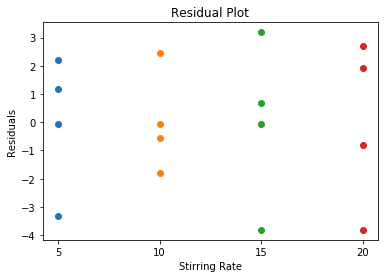

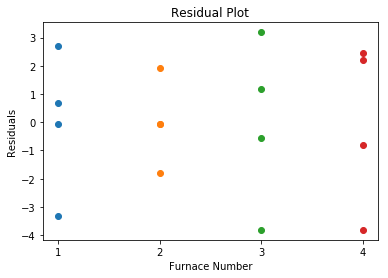

In [110]:
for i in range(b):
    plt.plot(np.full(b, fill_value=5*i+5), residuals[i,:], 'o')
plt.ylabel("Residuals")
plt.xlabel("Stirring Rate")
plt.title("Residual Plot")
plt.xticks(np.arange(5*1,5*a+1,5))
plt.show()

for j in range(a):
    plt.plot(np.full(a,fill_value=j+1), residuals[:,j], 'o')
plt.ylabel("Residuals")
plt.xlabel("Furnace Number")
plt.title("Residual Plot")
plt.xticks(np.arange(1,b+1,1))
plt.show()

#### Answer
Examining the residuals versus fits for the treatments and blocks, the constant variance assumption is quite well satisfied. The residuals have very close to the same variance for each treatment and block. 


### d )

#### Answer

The best stirring rate for lowest grain size is 5rpm since it has the lowest mean grain size. However, the stirring rate doesn't appear to have an effect on grain size so it probably won't matter.


## 5.4

## Solution

### a ) 

The sum of squares for the model is given by the equation $SS_{Model} = SS_{A} + SS_{B} + SS_{AB} $. Thus, the F statistic for the model should indicate whether any of the factor A, B, or the interaction AB, are significant. Thus there are three sets of hypotheses being tested:

$H_{0A}$: Factor A does not have an effect on the response, $H_{1A}$: Factor A does have an effect on the response 

$H_{0B}$: Factor B does not have an effect on the response, $H_{1B}$: Factor A does have an effect on the response 

$H_{0AB}$: Interaction term AB does not have an effect on the response, $H_{1AB}$: Interaction term AB does have an effect on the response 



### b )

Assuming $\alpha = 0.05$, then given that the probability of the F-value of the model, $F_0 = 3.28$ is $0.09$, we can conclude that the effects of the model are probably not significant. 

### c )

We know that the degrees of freedom for A is $a-1$, DF for B is $b-1$, DF for interaction is $(a-1)(b-1)$, and DF for the total is $abn-1$. We have that $b-1=2$. We also have that $(a-1)(b-1)=2$. This tells us that $$(a-1)(2-1)=2 \Rightarrow (a-1)(1)=2 \Rightarrow a-1=2 \Rightarrow a=3$$ 
Thus, there were 3 levels of factor A tested.

### d )

We have that $a=3$, $b=2$, and $abn-1=11$. This yields $$(3)(2)n-1=11 \Rightarrow 6n-1=11 \Rightarrow 6n=12 \Rightarrow n=2$$ 
Thus, 2 replicates were run.

## 5.13


### a )

### Solution


In [111]:
op1_m1 = np.array([109,110])
op1_m2 = np.array([110,115])
op1_m3 = np.array([108,109])
op1_m4 = np.array([110,108])

op2_m1 = np.array([110,112])
op2_m2 = np.array([110,111])
op2_m3 = np.array([111,109])
op2_m4 = np.array([114,112])

op3_m1 = np.array([116,114])
op3_m2 = np.array([112,115])
op3_m3 = np.array([114,119])
op3_m4 = np.array([120,117])

a = 3
b = 4
n = 2
alpha = 0.05
data = np.array([[op1_m1, op1_m2, op1_m3, op1_m4],
                 [op2_m1, op2_m2, op2_m3, op2_m4],
                 [op3_m1, op3_m2, op3_m3, op3_m4]])

row_avg = np.array([0.,0.,0.])
for i in range(a):
    row_avg[i] = (1/(b*n))*np.sum(data[i])

col_avg = np.array([0.,0.,0.,0.])
for j in range(b):
    col_avg[j] = (1/(a*n))*np.sum(data[:,j])

cell_avg = np.zeros((a,b))
for i in range(a):
    for j in range(b):
        cell_avg[i,j] = (1/n)*np.sum(data[i,j])

grand_avg = (1/(a*b*n))*np.sum(data)

SST = np.sum(np.square(data - grand_avg))

SSA = (b*n)*np.sum(np.square(row_avg - grand_avg))
SSB = (a*n)*np.sum(np.square(col_avg - grand_avg))

SSAB = 0
for i in range(a):
    for j in range(b):
        SSAB += np.square(cell_avg[i,j] - row_avg[i] - col_avg[j] + grand_avg)
SSAB = n*SSAB
        
SSE = 0
for i in range(a):
    for j in range(b):
        for k in range(n):
            SSE += np.square(data[i,j,k]-cell_avg[i,j])


display(md("SST: {:.3f}".format(SST)))
display(md("SSA: {:.3f}".format(SSA)))
display(md("SSB: {:.3f}".format(SSB)))
display(md("SSAB: {:.3f}".format(SSAB)))
display(md("SSE: {:.3f}".format(SSE)))
sum_squares = np.array([SSA, SSB, SSAB, SSE])

MSA = SSA/(a-1)
MSB = SSB/(b-1)
MSAB = SSAB/((a-1)*(b-1))
MSE = SSE/(a*b*(n-1))
display(md("MSA: {:.3f}".format(MSA)))
display(md("MSB: {:.3f}".format(MSB)))
display(md("MSAB: {:.3f}".format(MSAB)))
display(md("MSE: {:.3f}".format(MSE)))
mean_squares=np.array([MSA, MSB, MSAB, MSE])

F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE

f_vals = np.array([F0_A, F0_B, F0_AB, 0])

f_crit_a = stats.f.ppf(1-alpha,a-1,a*b*(n-1))
f_crit_b = stats.f.ppf(1-alpha,b-1,a*b*(n-1))
f_crit_ab = stats.f.ppf(1-alpha,(a-1)*(b-1),a*b*(n-1))
f_crits = np.array([f_crit_a, f_crit_b, f_crit_ab,0])

pval_A = 1 - stats.f.cdf(F0_A, a-1,a*b*(n-1))
pval_B = 1 - stats.f.cdf(F0_B, b-1,a*b*(n-1))
pval_AB = 1 - stats.f.cdf(F0_AB, (a-1)*(b-1),a*b*(n-1))
pvals = np.array([pval_A, pval_B, pval_AB, 0])

vals_data = np.array([sum_squares,mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['Operator', 'Machine', 'Interaction', 'Error'], 
                       columns=['Sum of Squares', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)


SST: 262.958

SSA: 160.333

SSB: 12.458

SSAB: 44.667

SSE: 45.500

MSA: 80.167

MSB: 4.153

MSAB: 7.444

MSE: 3.792

,Sum of Squares,Mean Square,F0,F Threshold,p-value
Operator,160.333333,80.166667,21.1429,3.88529,0.000116674
Machine,12.458333,4.152778,1.09524,3.49029,0.388753
Interaction,44.666667,7.444444,1.96337,2.99612,0.150681
Error,45.500000,3.791667,,,


#### Answer

Based on the value of $F_0=21.14$ for the Operator which is greater than the threshold value of $3.885$, we can conclude that the Operator is a significant factor in the breaking strength. However, the value of $F_0=1.10$ for the Machine is less than the threshold of $3.49$ so we can conclude that the Machine is not a significant factor in the breaking strength. Aditionally, the value of $F_0=1.96$ for the interaction term is less than the threshold of $2.996$ so we can conclude that the interaction term is not a siginificant factor in breaking strength.

### b )

### Solution


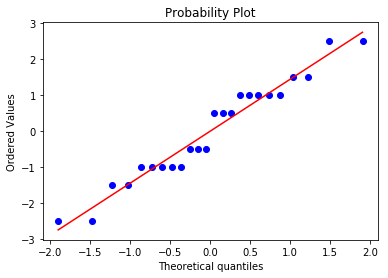

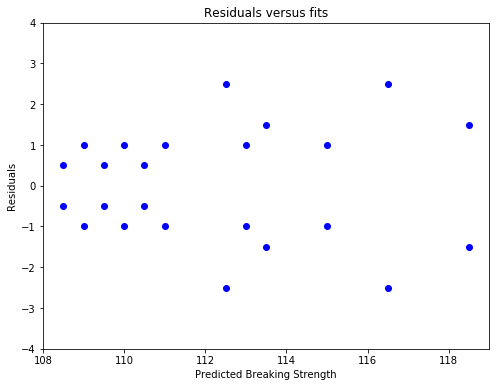

In [112]:
residuals = np.zeros((a,b,n))


for i in range(a):
    for j in range(b):
        for k in range(n):
            residuals[i, j, k] = data[i,j,k] - cell_avg[i,j]

stats.probplot(np.ndarray.flatten(residuals), plot=plt)
plt.show()

plt.figure(figsize=(8,6))
fits = np.ndarray.flatten(cell_avg)
for k in range(n):
    plt.plot(fits, np.ndarray.flatten(residuals[:,:,k]), 'bo')

plt.title("Residuals versus fits")
plt.ylabel("Residuals")
plt.xlabel("Predicted Breaking Strength")
plt.yticks(np.arange(-4,5,1))
plt.show()


#### Answer

Examining the residual normal probability plot we see some interesting step patterns that don't seem to quite fit the line like we would prefer. Additionally checkign the residuals versus fits we see that the variances for the different groups ranges from (-0.5,0.5) for some residuals while for a couple other groups it is (-3,3). Given this difference in the residual variances, the ANOVA results may be made better by transforming the data. 

## 5.35

### a )

### Solution

In [113]:
sm = np.array([31,33,35])
sc = np.array([36,40,41])
mm = np.array([36,35,33])
mc = np.array([40,41,42])
lm = np.array([37,34,33])
lc = np.array([38,36,39])

data = np.array([[sm, sc],
                 [mm, mc],
                 [lm, lc]])
a = 3
b = 2
n = 3
alpha = 0.05

row_avg = np.array([0.,0.,0.])
for i in range(a):
    row_avg[i] = (1/(b*n))*np.sum(data[i])

col_avg = np.array([0.,0.])
for j in range(b):
    col_avg[j] = (1/(a*n))*np.sum(data[:,j])

cell_avg = np.zeros((a,b))
for i in range(a):
    for j in range(b):
        cell_avg[i,j] = (1/n)*np.sum(data[i,j])

grand_avg = (1/(a*b*n))*np.sum(data)

SST = np.sum(np.square(data - grand_avg))

SSA = (b*n)*np.sum(np.square(row_avg - grand_avg))
SSB = (a*n)*np.sum(np.square(col_avg - grand_avg))

SSAB = 0
for i in range(a):
    for j in range(b):
        SSAB += np.square(cell_avg[i,j] - row_avg[i] - col_avg[j] + grand_avg)
SSAB = n*SSAB
        
SSE = 0
for i in range(a):
    for j in range(b):
        for k in range(n):
            SSE += np.square(data[i,j,k]-cell_avg[i,j])


display(md("SST: {:.3f}".format(SST)))
display(md("SSA: {:.3f}".format(SSA)))
display(md("SSB: {:.3f}".format(SSB)))
display(md("SSAB: {:.3f}".format(SSAB)))
display(md("SSE: {:.3f}".format(SSE)))
sum_squares = np.array([SSA, SSB, SSAB, SSE])

MSA = SSA/(a-1)
MSB = SSB/(b-1)
MSAB = SSAB/((a-1)*(b-1))
MSE = SSE/(a*b*(n-1))
display(md("MSA: {:.3f}".format(MSA)))
display(md("MSB: {:.3f}".format(MSB)))
display(md("MSAB: {:.3f}".format(MSAB)))
display(md("MSE: {:.3f}".format(MSE)))
mean_squares=np.array([MSA, MSB, MSAB, MSE])

F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE

f_vals = np.array([F0_A, F0_B, F0_AB, 0])

f_crit_a = stats.f.ppf(1-alpha,a-1,a*b*(n-1))
f_crit_b = stats.f.ppf(1-alpha,b-1,a*b*(n-1))
f_crit_ab = stats.f.ppf(1-alpha,(a-1)*(b-1),a*b*(n-1))
f_crits = np.array([f_crit_a, f_crit_b, f_crit_ab,0])

pval_A = 1 - stats.f.cdf(F0_A, MSA,MSE)
pval_B = 1 - stats.f.cdf(F0_B, MSB,MSE)
pval_AB = 1 - stats.f.cdf(F0_AB, MSAB, MSE)
pvals = np.array([pval_A, pval_B, pval_AB, 0])

vals_data = np.array([sum_squares,mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['Key Size', 'Keyboard Feel', 'Interaction', 'Error'], 
                       columns=['Sum of Squares', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)



SST: 182.000

SSA: 12.333

SSB: 117.556

SSAB: 10.111

SSE: 42.000

MSA: 6.167

MSB: 117.556

MSAB: 5.056

MSE: 3.500

,Sum of Squares,Mean Square,F0,F Threshold,p-value
Key Size,12.333333,6.166667,1.7619,3.88529,0.322147
Keyboard Feel,117.555556,117.555556,33.5873,4.74723,0.00345268
Interaction,10.111111,5.055556,1.44444,3.88529,0.387055
Error,42.000000,3.500000,,,


#### Answer

Examining the results, we see that the $F_0$ for key size is 1.762 which is not greater than the threshold value of 3.885. Thus, Key size does not have an effect on typing speed. However, the $F_0$ for Keyboard feel is 33.59 which is significantly greater than the threshold value of 4.75. Thus we can conclude that the Keyboard feel is a significant factor in typing speed. Lastly, the interaction $F_0$ is 1.44 which is less than the threshold value of 3.885 so we can conclude that the interaction effect is not a significant factor.

### b )

### Solution

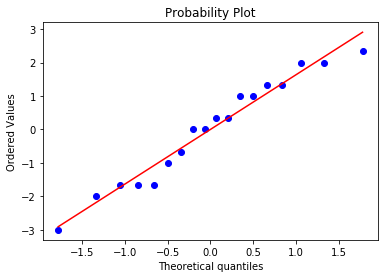

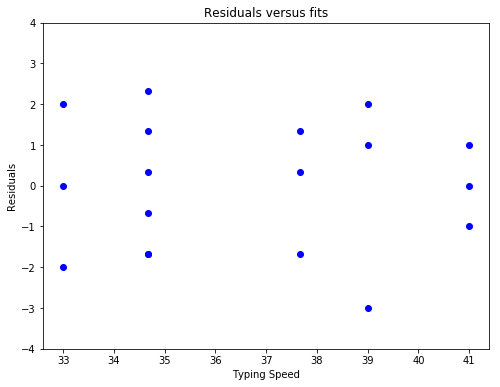

In [114]:
residuals = np.zeros((a,b,n))


for i in range(a):
    for j in range(b):
        for k in range(n):
            residuals[i, j, k] = data[i,j,k] - cell_avg[i,j]

stats.probplot(np.ndarray.flatten(residuals), plot=plt)
plt.show()

plt.figure(figsize=(8,6))
fits = np.ndarray.flatten(cell_avg)
for k in range(n):
    plt.plot(fits, np.ndarray.flatten(residuals[:,:,k]), 'bo')

plt.title("Residuals versus fits")
plt.ylabel("Residuals")
plt.xlabel("Typing Speed")
plt.yticks(np.arange(-4,5,1))
plt.show()

#### Answer

Examining the residual normal probability plot, we see that the residuals are mostly normally distributed although there appear to be a couple of outliers. Additionally, examining the residuals versus fits, all of the residuals have close variances although there are some differences. All of the variances for the residuals fall into the window of (-3,3). Since the ANOVA assumptions are satisfied, the model is adequate.

### c )

### Solution

#### Answer

Based on the ANOVA assumptions being satisfied and keyboard feel being a significant factor, we can conclude that keyboard feel is the only important factor in typing speed. Since key size and the interaction effect were not statistically significant, we can conclude that these factors are not important. 